# ***FOREIGN EXCHANGE RATES ANALYSIS(INR(₹) V/S USD($))***

***LOOKING AT THE DATABASE***

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/USDINR_series.csv',sep=',')
df

,Date,USDINR_Open,USDINR_High,USDINR_Low,USDINR_Close,USDINR_Adj Close
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001
...,...,...,...,...,...,...
4571,2021-08-24,74.105904,74.219498,74.055000,74.105904,74.105904
4572,2021-08-25,74.144897,74.301804,74.094299,74.144798,74.144798
4573,2021-08-26,74.101799,74.267502,74.068001,74.099998,74.099998
4574,2021-08-27,74.156197,74.330002,73.438004,74.155998,74.155998


In [ ]:
for i in df.columns:
  print(i)

Date
USDINR_Open
USDINR_High
USDINR_Low
USDINR_Close
USDINR_Adj Close


***CHECKING THE DATA TYPES OF COLUMNS***

In [ ]:
types=df.dtypes
print(types)

Date                 object
USDINR_Open         float64
USDINR_High         float64
USDINR_Low          float64
USDINR_Close        float64
USDINR_Adj Close    float64
dtype: object


***CONVERTING THE OBJECT TYPE INTO INT TYPE IN DATE COLUMN***

In [ ]:
#df['NumericDate'] = (pd.to_datetime(df['Date']) - pd.to_datetime(df['Date'].min())).dt.days
#df

***CHECKING THE NULL VALUES***

In [ ]:
df.isnull().sum()

Date                0
USDINR_Open         0
USDINR_High         0
USDINR_Low          0
USDINR_Close        0
USDINR_Adj Close    0
dtype: int64

***RENAMING THE COLUMNS***

In [ ]:
df.rename(columns={'USDINR_Open': 'Open'}, inplace=True)
df.rename(columns={'USDINR_Close': 'Close'}, inplace=True)
df.rename(columns={'USDINR_High': 'High'}, inplace=True)
df.rename(columns={'USDINR_Low': 'Low'}, inplace=True)
df.rename(columns={'USDINR_Adj Close': 'Adjusted Close'}, inplace=True)
df

,Date,Open,High,Low,Close,Adjusted Close
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001
...,...,...,...,...,...,...
4571,2021-08-24,74.105904,74.219498,74.055000,74.105904,74.105904
4572,2021-08-25,74.144897,74.301804,74.094299,74.144798,74.144798
4573,2021-08-26,74.101799,74.267502,74.068001,74.099998,74.099998
4574,2021-08-27,74.156197,74.330002,73.438004,74.155998,74.155998


***CHECKING THE CORRELATION AMONG DIFFERENT COLUMNS OF THE DATAFRAME***

In [ ]:
df[['Open','High','Low','Close','Adjusted Close']].corr()

,Open,High,Low,Close,Adjusted Close
Open,1.000000,0.999823,0.999774,0.999887,0.999887
High,0.999823,1.000000,0.999693,0.999815,0.999815
Low,0.999774,0.999693,1.000000,0.999766,0.999766
Close,0.999887,0.999815,0.999766,1.000000,1.000000
Adjusted Close,0.999887,0.999815,0.999766,1.000000,1.000000


***HEATMAP FOR CORRELATION***

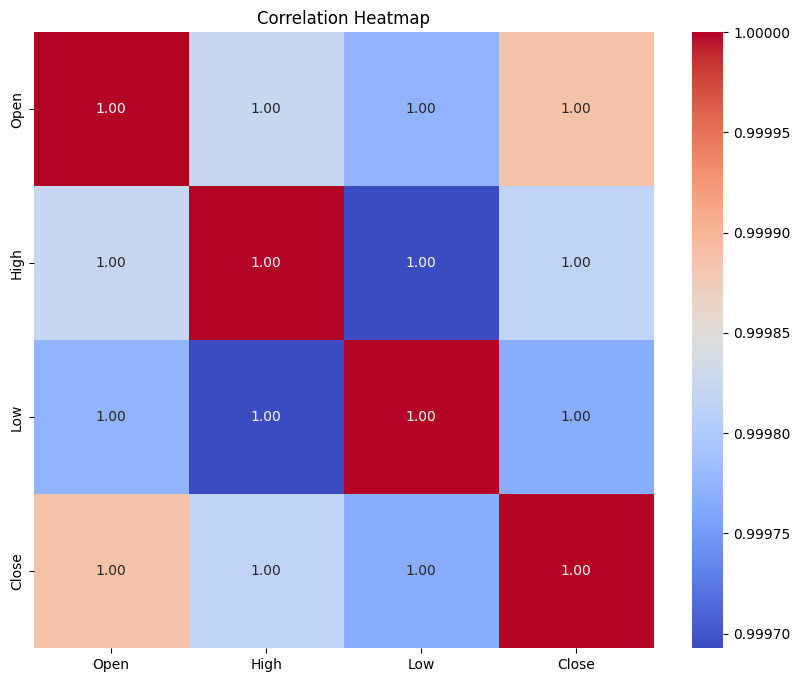

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = ['Open',  'High', 'Low','Close' ]


correlation_matrix = df[numerical_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

***CHANGING THE DATA TO DATETIME***

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df_monthly = df.resample('Y').mean()

***ASSINING THE PERIODS AND CURRENCIES SEPERATELY***

In [ ]:
X=df.index
Y=df.iloc[:,1:]

***PLOTTING THE GRAPHS FOR THE OPEN,HIGH,LOW AND CLOSE VALUES***

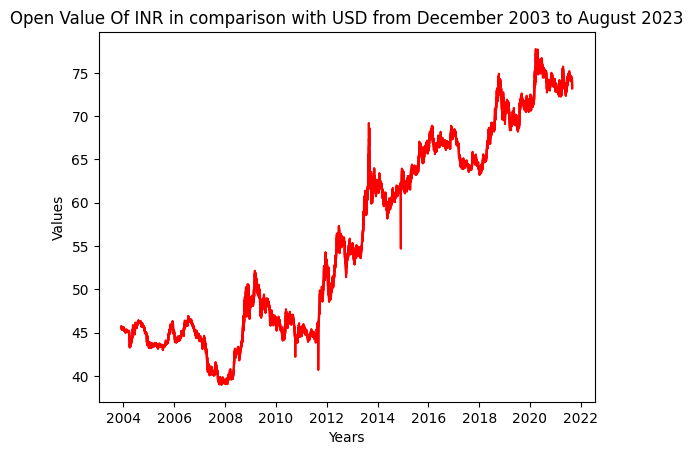

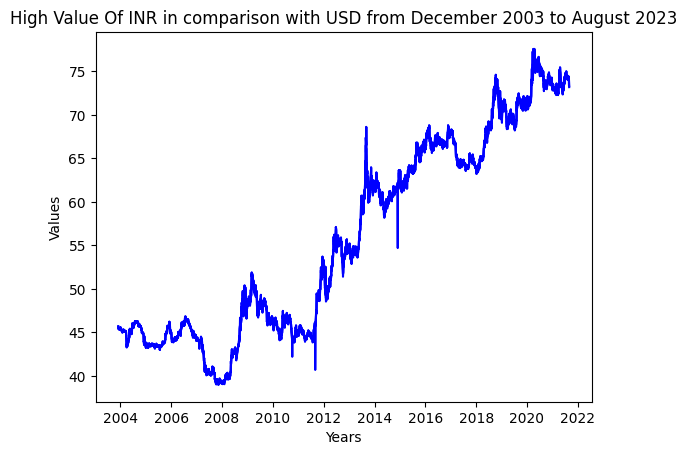

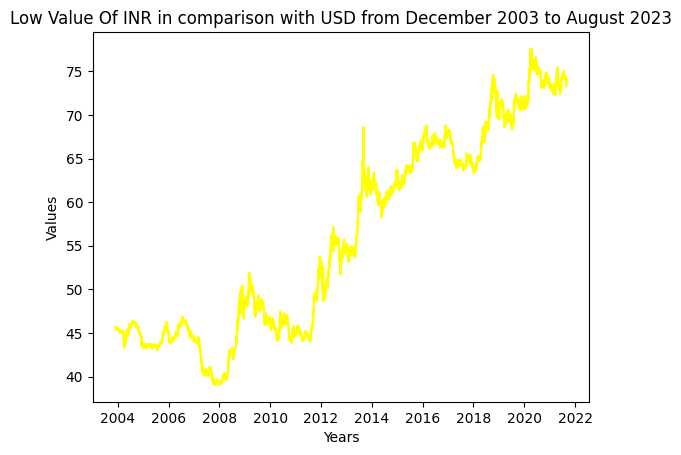

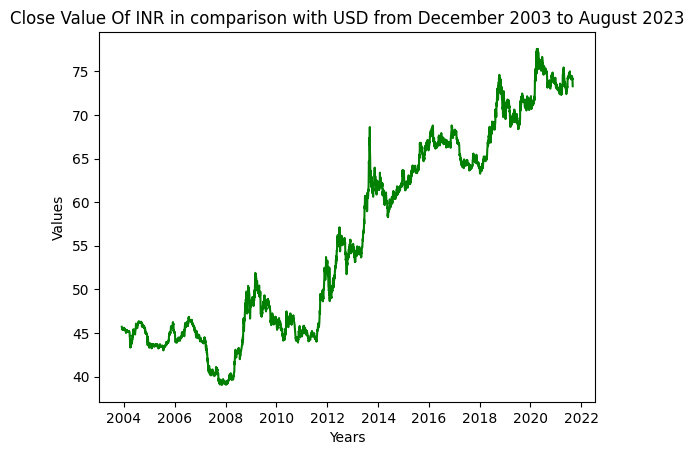

In [ ]:
import matplotlib.pyplot as plt
colour=['red','blue','yellow','green','orange','black']
titles=['Open Value','High Value','Low Value','Close Value','Adjusted Close Values']
for i in range(4):
  plt.plot(X,Y.iloc[:,i:],label=titles[i]+" of INR comparing with USD",color=colour[i])
  plt.title(titles[i]+" Of INR in comparison with USD from December 2003 to August 2023")
  plt.xlabel('Years')
  plt.ylabel('Values')
  plt.show()

***PLOTTING OHLC GRAPH FOR SHOW THE BEARISH AND BULLISH PERIODS***

In [ ]:
#pip install plotly

In [ ]:
import plotly.graph_objs as go
fig = go.Figure(data=[go.Candlestick(x=X,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.update_layout(title_text="OHLC graph from 1 December 2003-3 August 2023")
fig.show()

*In the graph the green parts represent bullish period where as red parts represent bearish periods*

***USING LINEAR REGRESSION TO PREDICT THE CLOSING DATA WITH HIGH,LOW AND OPEN DATA***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X1=df[['Open','High','Low']]
Y1=df['Close']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X1,Y1,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(Xtrain,Ytrain)
Ypred=model.predict(Xtest)
coef=model.coef_
intercept=model.intercept_
print("Close=Open*{0}+High*{1}+Low*{2}{3}".format(round(coef[0],3),round(coef[1],3),round(coef[2],3),round(intercept,3)))
mse=mean_squared_error(Ytest,Ypred)
print("Mean Squared error is: {0}".format(round(mse,3)))

Close=Open*0.573+High*0.268+Low*0.16-0.098
Mean Squared error is: 0.017


***ACTUAL DATA V/S TRAINED DATA***

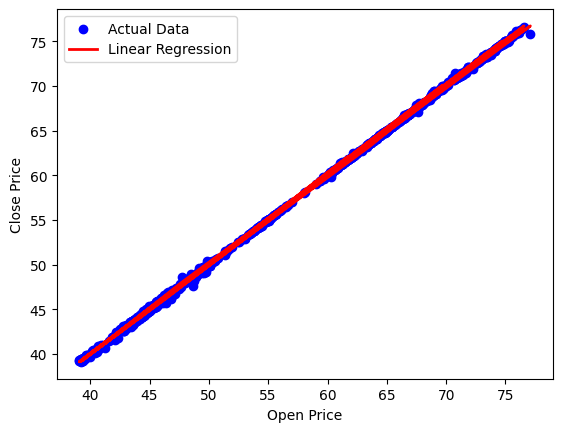

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(Xtest['Open'], Ytest, color='blue', label='Actual Data')
plt.plot(Xtest['Open'], Ypred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.show()

*So from the above graph we can see that our model is doing pretty well in trained as well as test data*

***PREDICTING THE CLOSING RATE FOR 3RD NOVEMBER 2023***

In [ ]:
Open1=83.3077
High1=83.3153
Low1=83.0788
Close=Open1*0.573+High1*0.268+Low1*0.16-0.098
print("Closing Rate on 3rd November 2023 would be ₹{0}".format(round(Close,3)))

Closing Rate on 3rd November 2023 would be ₹83.258


***TESTING LINEAR REGRESSION FOR CHANGE IN CLOSING RATE ONLY WITH TIME***

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/USDINR_series.csv',sep=',')

In [ ]:
df1.rename(columns={'USDINR_Open': 'Open'}, inplace=True)
df1.rename(columns={'USDINR_Close': 'Close'}, inplace=True)
df1.rename(columns={'USDINR_High': 'High'}, inplace=True)
df1.rename(columns={'USDINR_Low': 'Low'}, inplace=True)
df1.rename(columns={'USDINR_Adj Close': 'Adjusted Close'}, inplace=True)
df1

,Date,Open,High,Low,Close,Adjusted Close
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001
...,...,...,...,...,...,...
4571,2021-08-24,74.105904,74.219498,74.055000,74.105904,74.105904
4572,2021-08-25,74.144897,74.301804,74.094299,74.144798,74.144798
4573,2021-08-26,74.101799,74.267502,74.068001,74.099998,74.099998
4574,2021-08-27,74.156197,74.330002,73.438004,74.155998,74.155998


In [ ]:
df1['NumericDate'] = (pd.to_datetime(df1['Date']) - pd.to_datetime(df1['Date'].min())).dt.days
df1

,Date,Open,High,Low,Close,Adjusted Close,NumericDate
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999,0
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002,1
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999,2
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000,3
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001,4
...,...,...,...,...,...,...,...
4571,2021-08-24,74.105904,74.219498,74.055000,74.105904,74.105904,6476
4572,2021-08-25,74.144897,74.301804,74.094299,74.144798,74.144798,6477
4573,2021-08-26,74.101799,74.267502,74.068001,74.099998,74.099998,6478
4574,2021-08-27,74.156197,74.330002,73.438004,74.155998,74.155998,6479


***CHECKING THE CORRELATION THIS TIME INCLUDING NUMERIC DATE***

In [ ]:
df1[['Open','High','Low','Close','Adjusted Close','NumericDate']].corr()

,Open,High,Low,Close,Adjusted Close,NumericDate
Open,1.000000,0.999823,0.999774,0.999887,0.999887,0.942248
High,0.999823,1.000000,0.999693,0.999815,0.999815,0.942469
Low,0.999774,0.999693,1.000000,0.999766,0.999766,0.942376
Close,0.999887,0.999815,0.999766,1.000000,1.000000,0.942120
Adjusted Close,0.999887,0.999815,0.999766,1.000000,1.000000,0.942120
NumericDate,0.942248,0.942469,0.942376,0.942120,0.942120,1.000000


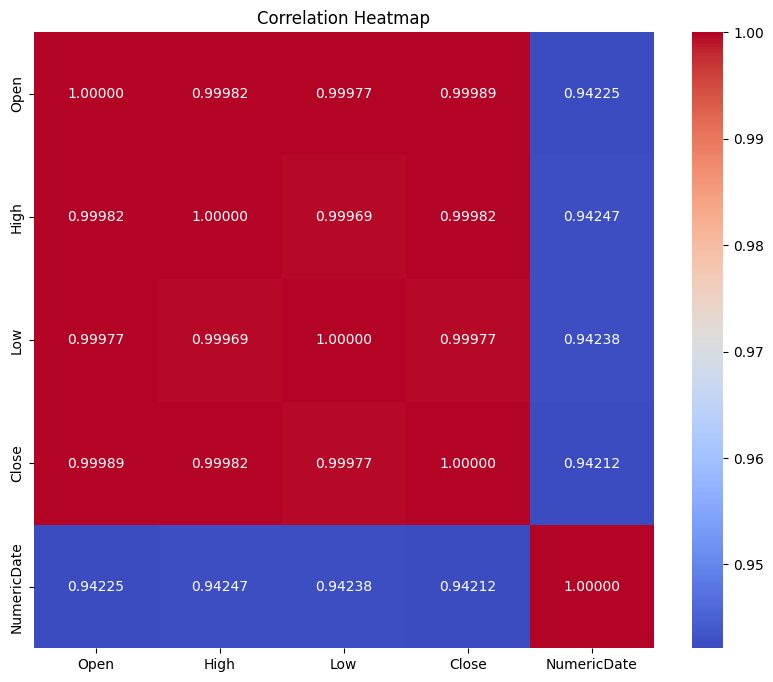

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = ['Open',  'High', 'Low','Close' ,'NumericDate']


correlation_matrix = df1[numerical_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.5f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
ctypes=df1.dtypes
print(ctypes)

Date               object
Open              float64
High              float64
Low               float64
Close             float64
Adjusted Close    float64
NumericDate         int64
dtype: object


In [ ]:
column_name = 'NumericDate'
if column_name in df1:
    df1[column_name] = df1[column_name].astype(float)
nctypes=df1.dtypes

In [ ]:
X3=df1[['NumericDate']]
Y3=df1['Close']
X2train,X2test,Y2train,Y2test=train_test_split(X3,Y3,test_size=0.2,random_state=42)
model1=LinearRegression()
model1.fit(X2train,Y2train)
Y2pred=model1.predict(X2test)
coef2=model1.coef_[0]
intercept2=model1.intercept_
print('Close={0}*NumericDate+{1}'.format(round(coef2,3),round(intercept2,3)))
mse1=mean_squared_error(Y2test,Y2pred)
print("Mean Squared error is: {0}".format(round(mse1,3)))

Close=0.006*NumericDate+37.403
Mean Squared error is: 14.717


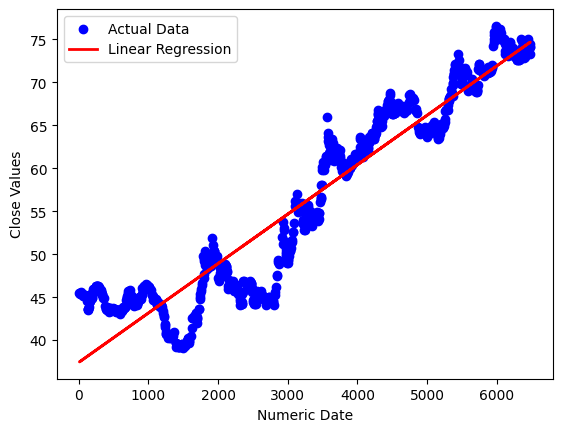

In [ ]:
plt.scatter(X2test, Y2test, color='blue', label='Actual Data')
plt.plot(X2test, Y2pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Numeric Date')
plt.ylabel('Close Values')
plt.legend(loc='best')
plt.show()

*So this shows that our data does not go well with the change in dates as compared to other factors*

***MAKING A PREDICTION FOR OPENING PRICE FOR 5TH JANUARY 2024***

In [ ]:
import pandas as pd

def date_to_numeric(input_date, reference_date):
    input_date = pd.to_datetime(input_date)
    reference_date = pd.to_datetime(reference_date)
    numeric_date = (input_date - reference_date).days
    return numeric_date
inpu='2023-11-03'
ref='2003-12-01'
num=date_to_numeric(inpu,ref)
Close2=(0.006*num)+37.403
print("The Opening Price according to our model's equation on 3rd November 2023 will be ₹{0}".format(round(Close2,3)))

The Opening Price according to our model's equation on 3rd November 2023 will be ₹81.065


*The outcome of our model says that on 3rd November 2023 that the closing rate would be ₹81.065 that is at the end of the season 1$ will be equal to ₹81.065*

***FINDING THE ERROR FOR BOTH THE ANALYSIS WE HAVE DONE***

In [ ]:
import math
diff=abs(Close-Close2)
print("The error we are getting from both data is approximately {0}".format(round(diff,3)))

The error we are getting from both data is approximately 2.193


*Note: The real world closing rate on 3rd November 2023 was ₹83.1745*